La idea es reducir la dimensión a 2D comparando los siguientes métodos:


*   Autoencoder con Dense layers y 2 *deep features*. 
*   Convolutional autoencoder con 2 *deep features*. 
*   CAE con 40 *deep features* y despues utilizar otra técnica para reducirlo a 2 (posiblemente t-SNE). 
*   Convolutional autoencoder con 10 *deep features*. 
*   PCA
*   t-SNE
*  UMAP
*   Autoencoder y despues t-SNE.

Se podría utilizar clustering posteriormente para ver la accuracy de cada método (posiblemente un par de algoritmos).   

Utilizar otro conjunto de datos.  
Reducción de la dimensionalidad (para clust) o visualización de datos.
 




# **Download-process-display Data**

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import mnist
import numpy as np


(x_train, y_train), (x_test, y_test) = mnist.load_data()

# (60000, 28, 28)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# (60000, 784)
x_train_d = x_train.reshape(   (len(x_train), np.prod(x_train.shape[1:])  )  ) #60000, 28*28=784
x_test_d = x_test.reshape(     (len(x_test), np.prod(x_test.shape[1:])  )    ) #10000, 784

# (60000, 28, 28, 1)
x_train_c = np.reshape(x_train, (len(x_train), 28, 28, 1))  # 60000, 28, 28, 1
x_test_c = np.reshape(x_test, (len(x_test), 28, 28, 1))     # 10000, 28, 28, 1

n_train = 60000
n_test = 10000
n_full = 70000

x_full = np.concatenate( ( x_train_d, x_test_d ) , axis=0)
print( x_full.shape )

y_full = np.concatenate( ( y_train, y_test ) , axis=0)
print( y_full.shape )


11493376/11490434 [==============================] - 0s 0us/step
(70000, 784)
(70000,)


In [ ]:
x_full_c = np.concatenate( ( x_train_c, x_test_c ) , axis=0)


.

In [ ]:
import numpy as np

semilla = 10 
np.random.seed(seed= semilla)
muestra = np.random.randint(0, high= n_full, size=10000, dtype='int')  

# https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html

In [ ]:
#np.random.choice(data.ravel(),5,replace=False)
x_rfull = x_full[muestra]
y_rfull = y_full[muestra]




---



.

# **Primer autoencoder con pocas capas**

Solo para experimentar

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend 
from keras import regularizers

encoding_dim = 2

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
x = Dense(128, activation='relu')(input_img) 
               #activity_regularizer=regularizers.l1(10e-5))(input_img) 
#x = BatchNormalization()(x)      # Normalize the activations of the previous layer at each batch.    / No mejora   
#x = Dense(32, activation='relu')(x)
encoded = Dense(2, activation='relu')(x)

###

#x = Dense(32, activation='relu')(encoded)
x = Dense(128, activation='relu')(encoded)
                #activity_regularizer=regularizers.l1(10e-5))(x) 
decoded = Dense(784, activation='sigmoid')(x)

autoencoder_d = Model(input_img, decoded)
autoencoder_d.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 202,258
Trainable params: 202,258
Non-trainable params: 0
_________________________________________________________________


.

In [ ]:
autoencoder_d.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['mae', 'mean_squared_error'])
#from keras import metrics
#metrics=[metrics.mae, metrics.categorical_accuracy])

In [ ]:

historyC = autoencoder_d.fit(x_train_d, x_train_d,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_d, x_test_d))


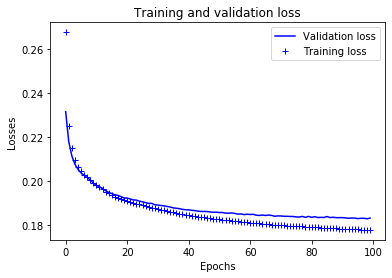

In [ ]:
epochs = range(0, 100)
val_loss = historyC.history["val_loss"]
train_loss = historyC.history["loss"]

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot( epochs , val_loss, 'b', label='Validation loss') 
plt.plot( epochs , train_loss, 'b+', label='Training loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()

plt.show()
# al final se empiezan a distanciar

In [ ]:
results = autoencoder_d.evaluate(x_test_d, x_test_d, batch_size=128)
results # = validation set

10000/10000 [==============================] - 0s 23us/sample - loss: 0.1834


0.18336432354450224

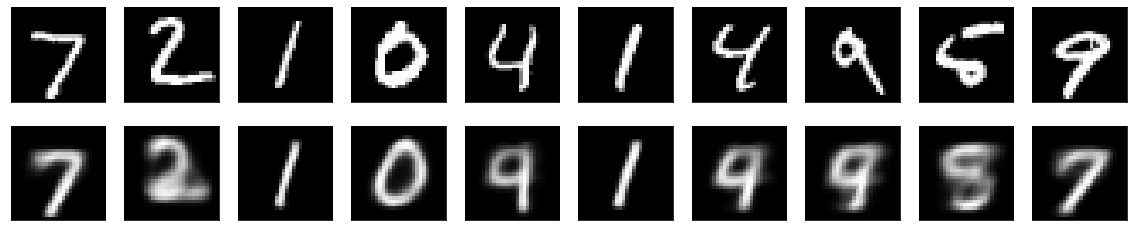

In [ ]:
predM = autoencoder_d.predict(x_test_d)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predM[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

No distingue bien el 4 del 9. Si distingue bien el 7,2,1 y 0.

In [ ]:
 
 #https://stackoverflow.com/questions/48924165/google-colaboratory-weight-download-export-saved-models
 #https://machinelearningmastery.com/save-load-keras-deep-learning-models/

autoencoder_d.save('autoencoder.h5')
#from keras.models import load_model
 
# load model
#model = load_model('model.h5')

# Verifique que el estado esté preservado
#new_predictions = new_model.predict(x_test)
#np.testing.assert_allclose(predictions, new_predictions, rtol=1e-6, atol=1e-6)

#http://docs.h5py.org/en/latest/quick.html
#https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

.

Valores de la capa intermedia

.


In [ ]:
for layer in autoencoder_d.layers:
    print(layer.name)
# max_pooling2d_92, las activaciones
# dense_7

input_13
dense_54
dense_55
dense_56
dense_57


In [ ]:
layer_name = 'dense_55'
intermediate_layer_model = Model(inputs=autoencoder_d.input,
                                 outputs=autoencoder_d.get_layer(layer_name).output)
out_reduc = intermediate_layer_model.predict(x_test_d)
print( out_reduc.shape )
#print( out_reduc[:,:,:, 0].shape )
print( out_reduc[:,0] )
#out_reduc

(10000, 2)
[36.399204   1.9272256 70.78119   ... 26.99007    6.110206   1.0277283]


In [ ]:
DF1 = out_reduc[:, 0]
DF2 = out_reduc[:, 1]

#out_reduc[0,:,:, 0]

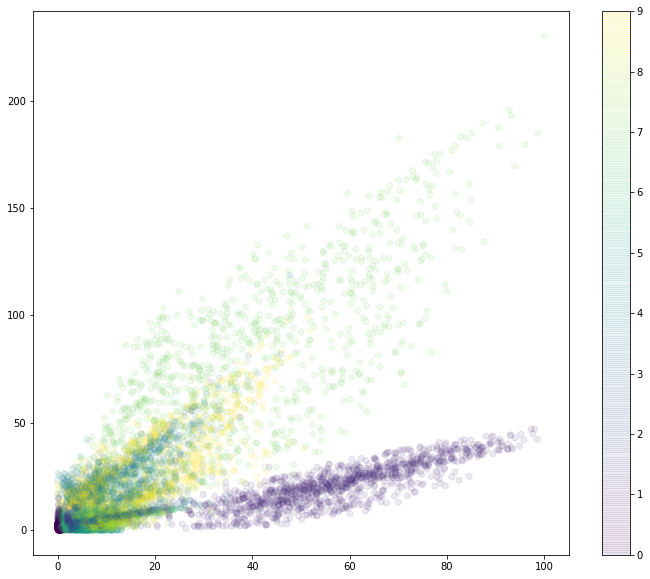

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter( DF1, DF2, c=y_test, cmap='viridis',alpha=0.1)
plt.colorbar()
plt.show()
#plt.savefig('output.png', dpi=300, bbox_inches='tight')


# **CAE mejor versión**

Mejorar el resultado con convoluciones

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, LeakyReLU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import backend 

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(20, (3, 3), padding='same')(input_img)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x =Conv2D(2, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
encoded = MaxPooling2D((2, 2), padding='same', name ="embedded")(x)
#encoded = Conv2D(8, (3, 3), activation='relu')(x)
#encoded = MaxPooling2D((2, 2), padding='same')(x)

###

x = UpSampling2D((2, 2))(encoded)
x = Conv2D(2, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
#x = UpSampling2D((2, 2))(x) # WTF=?¿
x = Conv2D(4, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (2, 2), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = UpSampling2D((3, 3))(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(20, (3, 3), strides=(1, 1), padding='valid', activation="relu")(x)
decoded = Conv2DTranspose(1, (3, 3), strides=(1, 1), padding='valid', activation='sigmoid')(x)

autoencoder_c = Model(input_img, decoded)

autoencoder_c.summary()

# Habra que modificar la capa intermedia a 2D

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)        2896      
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)        

**Algunas aclaraciones:**


*   Se podria decir que el autoencoder está basado en la red Alexnet es decir, va combinando Conv + MaxPool. Alternativamente, se podria haber utilizado SeparableConv2D, 1DConv etc.
*   En general con MaxPool no hace falta regularizar ya que el submuestreo con MaxPool de hecho funciona como un fuerte regularizador.
En la parte del decoder:
*   Se ha usado Upsampling con interpolación lineal y transpose convolution como método de learnable upsampling, (también llamada deconvolution, fraction strided conv etc.). El objetivo es pasar de un input en baja resolución a un output con resolución más alta. Otro elemento que se podria utilitzar es *UnPool* (aunque no está implementado en Keras si que se ha utilizado en Tensorflow). 
*   La típica (recomendable) estructura de un autoencoder es simétrica, aunque no necesariamente tiene que serlo. 
*   La capa intermedia o bottleneck tiene dos canales con una unidad en cada uno (2 deep features). 
*   Se ha utilizado la función de activación *Leaky Relu* porqué el valor resultante de la función de pérdida en el test de validación era menor.
*   Para conseguir un output (28x28) se ha utilizado Transposed Conv aunque también se podría haber aumentado por encima las dimensiones y después aplicar una Conv estándar (entre otros métodos). 
*   No se han utilizado *dense layers* ni se han aplanado (flatten) las unidades. A continuació se prueba otra estructura que sí que lo hace. 





.

In [ ]:
#from keras.utils import plot_model
#plot_model(autoencoder_c, to_file='autoencoder_c.png')


In [ ]:
from  tensorflow.keras.callbacks import EarlyStopping

autoencoder_c.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['mae','mean_squared_error'])

callbacks_list = [ EarlyStopping( monitor='val_loss', patience=10 )]
#https://keras.io/callbacks/#earlystopping

Se añade un callback que monitorea el Mean Absolute Error para detener el entrenamiento cuando no se mejore la métrica en 4 epochs (reduce tiempo entrenamiento sin perjudicar la precisión). 

In [ ]:

historyC = autoencoder_c.fit(x_train_c, x_train_c,
                epochs=500,
                batch_size=128,
                shuffle=True,
                callbacks=callbacks_list, 
                validation_data=(x_test_c, x_test_c))


.

In [ ]:
autoencoder_c.save('CAE_2Dadv_MNIST.h5')

In [ ]:
# se quitan los 5 primeros epoch
#epochs = range(5, 80)
#val_loss = historyC.history["val_loss"][5:80]
#train_loss = historyC.history["loss"][5:80]

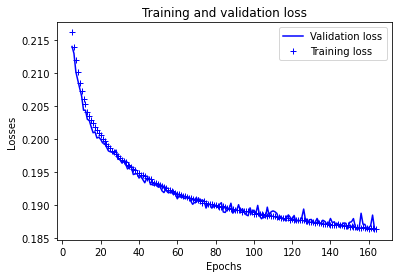

In [ ]:
#############
def plot_results( history_NN, min_epoch ):
  max_epoch = len( history_NN.history["val_loss"] )
  val_loss = history_NN.history["val_loss"][min_epoch:max_epoch]
  train_loss = history_NN.history["loss"][min_epoch:max_epoch]
  epochs = range(min_epoch, max_epoch)

  plt.plot( epochs , val_loss, 'b', label='Validation loss') 
  plt.plot( epochs , train_loss, 'b+', label='Training loss') 
  plt.title('Training and validation loss') 
  plt.xlabel('Epochs')
  plt.ylabel('Losses')
  plt.legend()

  #plt.savefig("training_plot")
  plt.show()

###############
  
plot_results( historyC, 5 )    


# quiza aun hay un poco de underfitting (se puede disminuir mas?)

In [ ]:
#for layer in autoencoder_c.layers:
#    print(layer.name)

layer_name = 'embedded'
intermediate_layer_model = Model(inputs=autoencoder_c.input,
                                 outputs=autoencoder_c.get_layer(layer_name).output)
out_reduc = intermediate_layer_model.predict(x_full_c)
print( out_reduc.shape )
#print( out_reduc[:,:,:, 0].shape )
#print( out_reduc[:,0] )

(70000, 1, 1, 2)


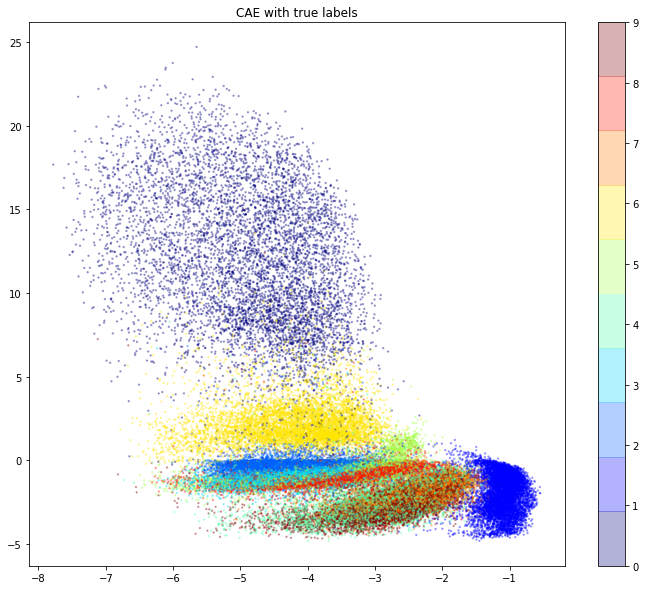

In [ ]:
#from matplotlib import cm
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap


DF1 = out_reduc[:,0,0, 0]
DF2 = out_reduc[:,0,0, 1]

plt.figure(figsize=(12, 10))
plt.scatter( DF1, DF2, c=y_full, cmap=plt.cm.get_cmap('jet', 10), alpha=0.3, s=2) 
plt.colorbar()
plt.title("CAE with true labels")
plt.show()
#plt.savefig('CAE_mnist.png')
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html


In [ ]:
CAE_2d = np.concatenate([[DF1],[DF2]])
#CAE_2d = CAE_2d.reshape(70000,2)
CAE_2d = CAE_2d.T

print( CAE_2d.shape )

#grafico(CAE_2d, fitxer='CAE_2d_mnist')

(70000, 2)


In [ ]:
CAE_2d[:,]

array([[ 5.808304 ,  4.662767 ],
       [ 7.0687647,  1.0888063],
       [ 8.320644 , 11.719481 ],
       ...,
       [ 4.027662 ,  6.4771   ],
       [ 3.997718 ,  3.5037973],
       [ 6.730935 ,  2.2345846]], dtype=float32)

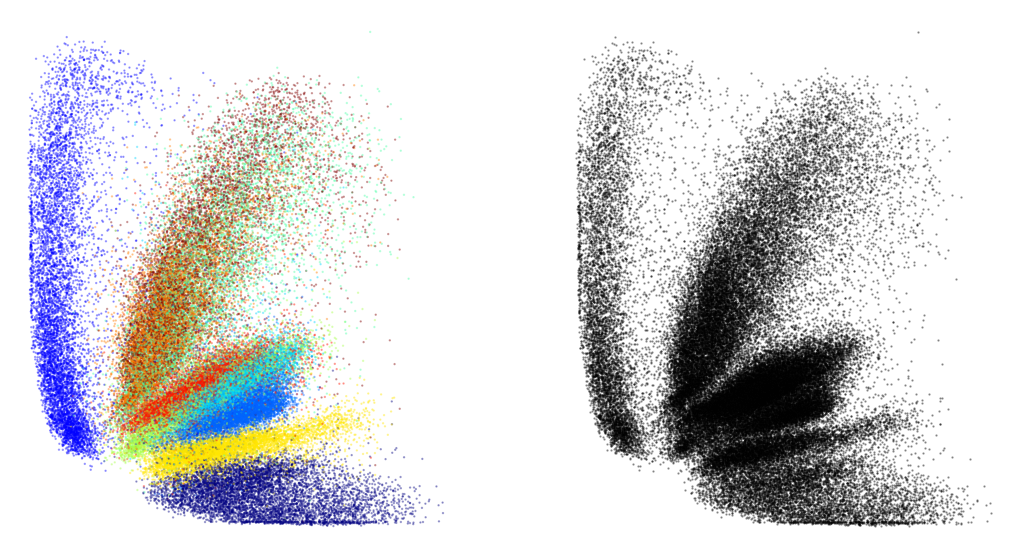

In [ ]:
grafico(CAE_2d, fitxer='CAE_2d_mnist')

Hay 3 números que no se pueden distinguir bien, en especial el nueve. La val_loss es parecida a la del modelo denso pero en el gráfico 2D se pueden distinguir mucho mejor los números. 



---



---



# **Probar otra estructura / CAE 10 dimensiones**

Para clustering

Source: https://blog.keras.io/building-autoencoders-in-keras.html

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, LeakyReLU, Flatten, Reshape

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense( 10, activation='relu' ,name="embedded" )(x)

# at this point the representation is 2 dimensional

x = Dense( 128, activation='relu' )(encoded)
x = Reshape( (4,4,8) )(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

CAE = Model(input_img, decoded)
CAE.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['mean_squared_error'])

callbacks_list = [ EarlyStopping( monitor='val_loss', patience=10 )]


In [ ]:
CAE.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)         

## Other options:
*   Optimizer adam
*   Different activation functions
*   Add parameters + Normalization layers
*   Use dense layers to form the latent space



In [ ]:

history_CAE = CAE.fit(x_train_c, x_train_c,
                epochs=400,
                batch_size=128,
                shuffle=True,
                callbacks=callbacks_list, 
                validation_data=(x_test_c, x_test_c))


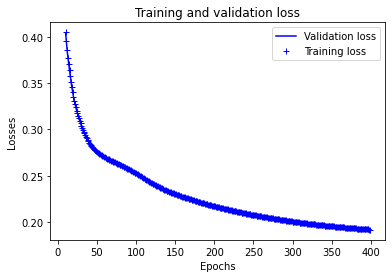

In [ ]:
plot_results( history_CAE, 10 )

In [ ]:
CAE.save('CAE_10D_MNIST.h5')

In [ ]:
feature_model = Model(inputs=CAE.input, outputs=CAE.get_layer("embedded").output)
features = feature_model.predict(x_full_c)
print('feature shape=', features.shape)

# features = np.reshape(features, newshape=(features.shape[0], -1))

feature shape= (70000, 10)


In [ ]:
#from matplotlib import cm
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap


DF1 = features[:,0,0, 0]
DF2 = features[:,0,0, 1]

plt.figure(figsize=(12, 10))
plt.scatter( DF1, DF2, c=y_full, cmap=plt.cm.get_cmap('jet', 10), alpha=0.3, s=2) 
plt.colorbar()
plt.title("CAE with true labels")
plt.show()
#plt.savefig('CAE_mnist.png')
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html


El output no se ajusta bien para el clustering!  
Clusters muy alargados y con poca densidad?  
Elegir bien el algoritmo

**Utilizar el output de la capa intermedia** de 10D

In [ ]:
kmeans_labels_CAE = cluster.KMeans(n_clusters=10, n_init=10, random_state=1997).fit_predict( features ) # embedded layer

In [ ]:
kmeans_labels_CAE

array([0, 0, 1, ..., 9, 8, 4], dtype=int32)

In [ ]:
print( 'NMI:', normalized_mutual_info_score(y_full, kmeans_labels_CAE) )
print( 'AMI:', adjusted_mutual_info_score(y_full, kmeans_labels_CAE) )
print( 'ARI:', adjusted_rand_score(y_full, kmeans_labels_CAE) )
print( 'ACC:', accuracy(y_full, kmeans_labels_CAE) )

NMI: 0.3144807776765768
AMI: 0.31430783025919823
ARI: 0.21472987783386063
ACC: 0.3881


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


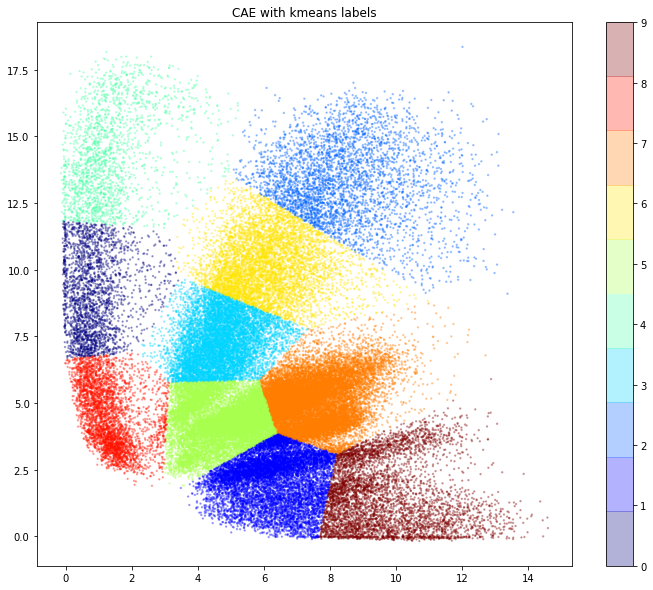

In [ ]:
# Mismo modelo utilizando 2D.

plt.figure(figsize=(12, 10))
plt.scatter( DF1, DF2, c=kmeans_labels_CAE, cmap=plt.cm.get_cmap('jet', 10), alpha=0.3, s=2) 
plt.colorbar()
plt.title("CAE with kmeans labels")
plt.show()

In [ ]:

hdlabels_CAE = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit(CAE_2d).labels_ # cluster_selection_epsilon


In [ ]:
unique_elements, counts_elements = np.unique( hdlabels_CAE, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   -1     0     1]
 [ 3737  6404 59859]]


In [ ]:
clustered = hdlabels_CAE >= 0

print( 'No grey observations' )
print( 'NMI:', normalized_mutual_info_score(y_full[clustered], hdlabels_CAE[clustered]) )
print( 'ARI:', adjusted_rand_score(y_full[clustered], hdlabels_CAE[clustered]) )
print( 'ACC:', accuracy(y_full[clustered], hdlabels_CAE[clustered]) )

print( 'NMI:', normalized_mutual_info_score(y_full, hdlabels_CAE) )



---





---



# **Diferente arquitectura**

Propuesta por Xifeng Guo

Se intentará reproducir la arquitectura utilizada por Xifeng Guo et. al. pero con una *embedded layer* de solamente dos unidades ya que lo que se quiere ver es el grafico 2D en vez de *clustering*. Además se intentará mejorar la estructura (ya que ellos no se centran en la parte de optimización).   

Esta arquitectura es mucho mas simple que la anterior pero al utilizar *Flatten* y *Reshape* puede que se interrumpa el aprendizaje espacial.    
Por otro lado las redes mas profunda suelen conseguir mejores resultados.   
[Enlace paper](https://www.researchgate.net/publication/320658590_Deep_Clustering_with_Convolutional_Autoencoders?enrichId=rgreq-97d515bc55f300dcd816a6dab5dc6ab3-XXX&enrichSource=Y292ZXJQYWdlOzMyMDY1ODU5MDtBUzo1Njk1NzU2MjE4OTQxNDRAMTUxMjgwODgxODQ0OA%3D%3D&el=1_x_2&_esc=publicationCoverPdf)

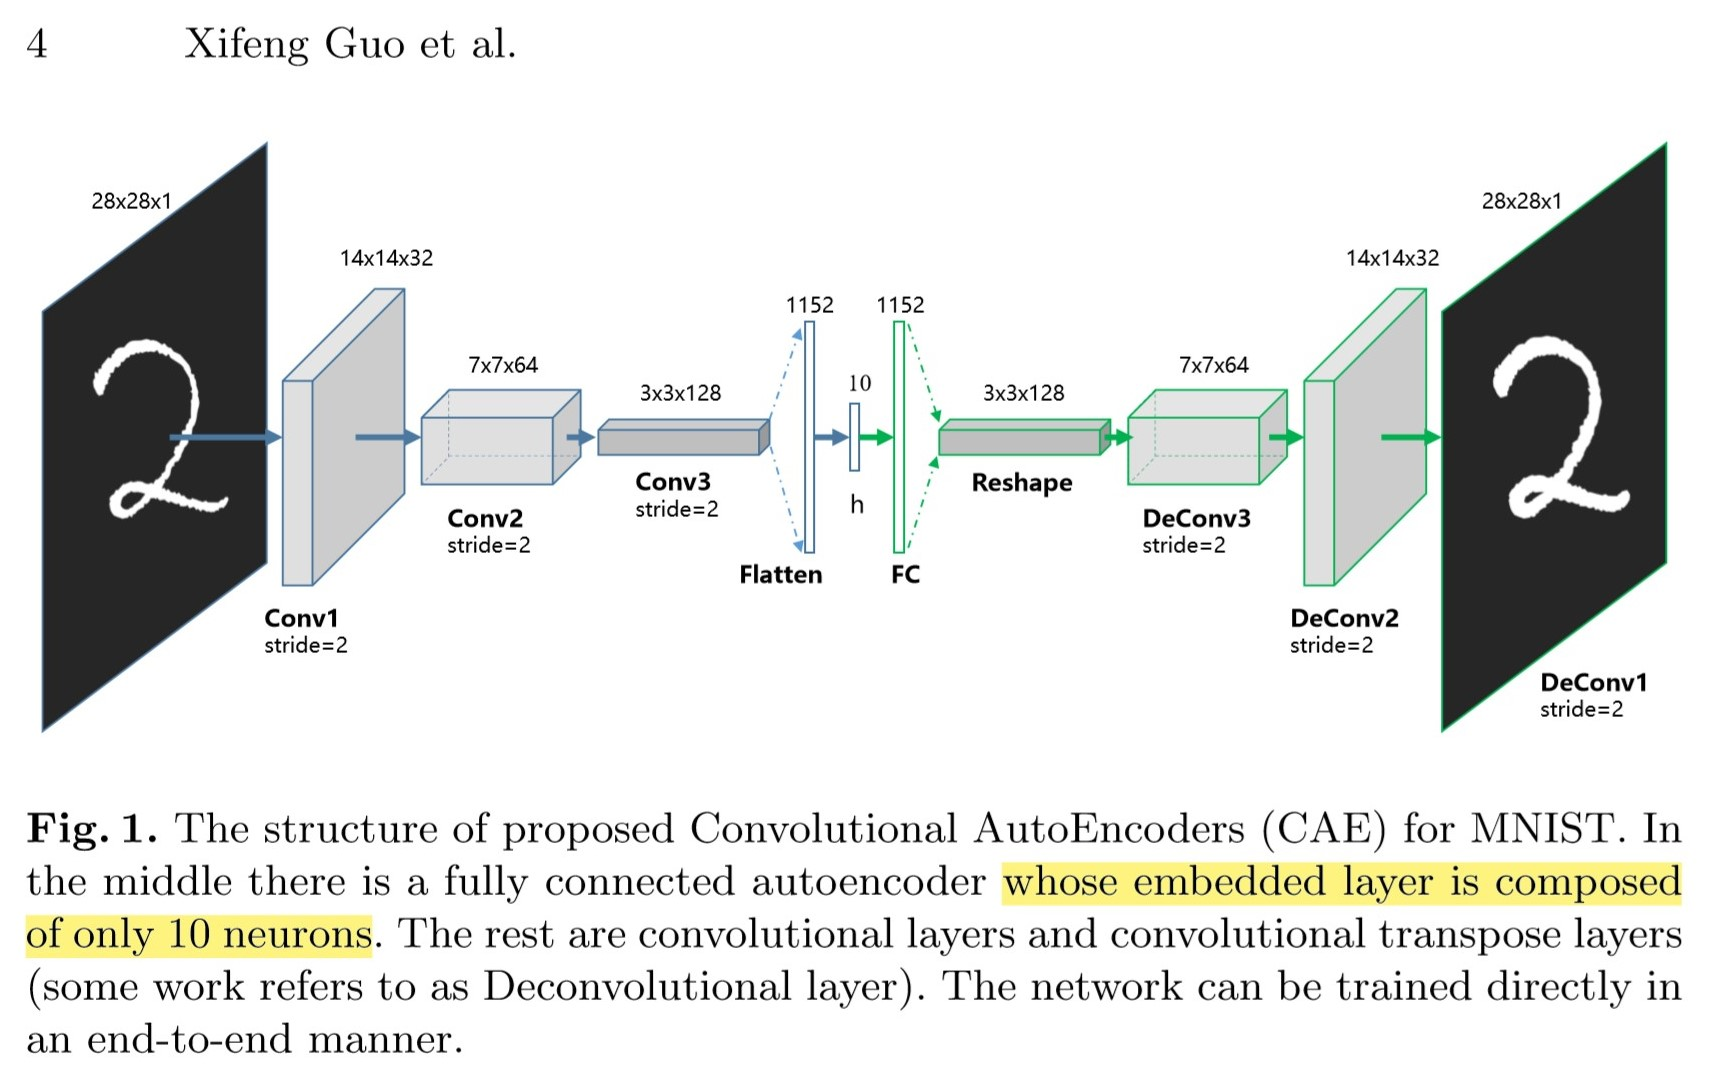

In [ ]:
from IPython.display import Image
Image('MNIST autoencoder xifeng out et al.jpg', width=862, height=540)


https://github.com/XifengGuo/DCEC  
Despues de implementar el codigo he visto que ya esta en github LOL

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, LeakyReLU, Flatten, Reshape 
# hay que añadir los dos ultimos (Flatten, Reshape)
from tensorflow.keras.models import Model
from tensorflow.keras import backend 

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (5, 5), strides=(2, 2), padding='same', activation='relu', name= "Conv1" )(input_img)
x = Conv2D(64, (5, 5), strides=(2, 2), padding='same', activation='relu', name= "Conv2" )(x)
x = Conv2D(128, (3, 3), strides=(2, 2), padding='valid', activation='relu', name= "Conv3" )(x)
x = Flatten()(x)
encoded = Dense( 10, activation='relu' ,name="embedded" )(x)

### 10 Dimensional latent space

x = Dense( 1152, activation='relu' )(encoded)
x = Reshape( (3,3,128) )(x)
x = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='valid', activation='relu', name= "DeConv3")(x) # importante, unico que tiene valid
x = Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', activation='relu', name= "DeConv2")(x)
decoded = Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation= None, name= "DeConv1")(x)

CAE_GUO = Model(input_img, decoded)

CAE_GUO.summary() # title="CAE proposed by Guo et.al"

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 14, 14, 32)        832       
_________________________________________________________________
Conv2 (Conv2D)               (None, 7, 7, 64)          51264     
_________________________________________________________________
Conv3 (Conv2D)               (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_8 (Flatten)          (None, 1152)              0         
_________________________________________________________________
embedded (Dense)             (None, 10)                11530     
_________________________________________________________________
dense_8 (Dense)              (None, 1152)            

In [ ]:
from  tensorflow.keras.callbacks import EarlyStopping
from  tensorflow.keras.callbacks import LearningRateScheduler
from  keras.optimizers import Adam

opt = Adam(learning_rate=0.0005, epsilon=0.1)

CAE_GUO.compile(optimizer=opt, loss='binary_crossentropy',metrics=['mae','mse'])


#def lr_scheduler(epoch, lr):
#    decay_rate = 0.1
#    decay_step = 90
#    if epoch % decay_step == 0 and epoch:
#        return lr * decay_rate
#    return lr

#lrate = LearningRateScheduler(lr_scheduler, verbose=1)
callbacks_list = [ EarlyStopping( monitor='val_loss', patience=10 )]

In [ ]:
history_GUO = CAE_GUO.fit(x_train_c, x_train_c,
                epochs=400,
                batch_size=128,
                shuffle=True,
                callbacks=callbacks_list, 
                validation_data=(x_test_c, x_test_c)  )

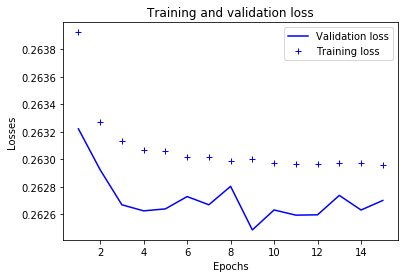

In [ ]:
# se quitan los 5 primeros epoch
epochs = range(1, 16)
val_loss = history_GUO.history["val_loss"][1:]
train_loss = history_GUO.history["loss"][1:]

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot( epochs , val_loss, 'b', label='Validation loss') 
plt.plot( epochs , train_loss, 'b+', label='Training loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()

plt.show()

Validation loss < Training loss !?

In [ ]:

feature_model = Model(inputs=CAE_GUO.input, outputs=CAE_GUO.get_layer("embedded").output)
features = feature_model.predict(x_full_c)
print('feature shape=', features.shape)

# features = np.reshape(features, newshape=(features.shape[0], -1))

feature shape= (70000, 2)


In [ ]:
features[10,:]

array([0., 0.], dtype=float32)

In [ ]:
grafico(features, fitxer='CAE_GUO_mnist')

In [ ]:
#import sklearn.cluster as cluster
kmeans_labels_CAE = cluster.KMeans(n_clusters=10, n_init=10, random_state=1997).fit_predict( features ) # embedded layer

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


In [ ]:
print( 'NMI:', normalized_mutual_info_score(y_full, kmeans_labels_CAE) )
print( 'AMI:', adjusted_mutual_info_score(y_full, kmeans_labels_CAE) )
print( 'ARI:', adjusted_rand_score(y_full, kmeans_labels_CAE) )
print( 'ACC:', accuracy(y_full, kmeans_labels_CAE) )

NMI: 0.46554605062181664
AMI: 0.46540543942611
ARI: 0.2573547318054354
ACC: 0.39357142857142857


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)




---



---



Siguientes pasos: 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://www.datacamp.com/community/tutorials/introduction-t-sne

https://colah.github.io/posts/2014-10-Visualizing-MNIST/
https://cs.stanford.edu/people/karpathy/cnnembed/

http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf


https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#a-demo-of-k-means-clustering-on-the-handwritten-digits-data

-Gráficos interactivos con *Altair* o *d3.js* para distinguir mejor las diferencias. 

how many clusters are in the original space, and do they correspond one-to-one to cluster in the t-SNE plot? Do the clusters have substructure that is not apparent in this visualisation? Pre-processing steps will yield different embeddings; how stable are the clusters?



---



FIN de autoencoders



---



# **Graficos de visualizacion para incluir en el proyecto**

In [ ]:
semilla= 1997
import time
import matplotlib.pyplot as plt

In [ ]:
def grafico(space, fitxer=''):

  fig, (ax1, ax2) = plt.subplots( nrows=1,ncols=2,figsize=(18, 10) )

  ax1.scatter( space[:,0], space[:,1], c= y_full, cmap=plt.cm.get_cmap('jet', 10), s=2 ,alpha=0.3 ) 
  ax1.axis('off')

  ax2.scatter( space[:,0], space[:,1],  c= "black", s=2 ,alpha=0.3 ) 
  ax2.axis('off')

  fig.savefig( fitxer )
  plt.show()

# TSNE

In [ ]:
from sklearn.manifold import TSNE

tsne1 = TSNE( n_components= 2, perplexity= 25.0, learning_rate= 10.0, n_iter=5000, random_state= semilla, n_iter_without_progress=200 )

time_start = time.time()
tsne_results = tsne1.fit_transform(x_rfull)
print( 't-SNE done! Time elapsed: {} seconds', time.time()-time_start )

t-SNE done! Time elapsed: {} seconds 484.8876702785492


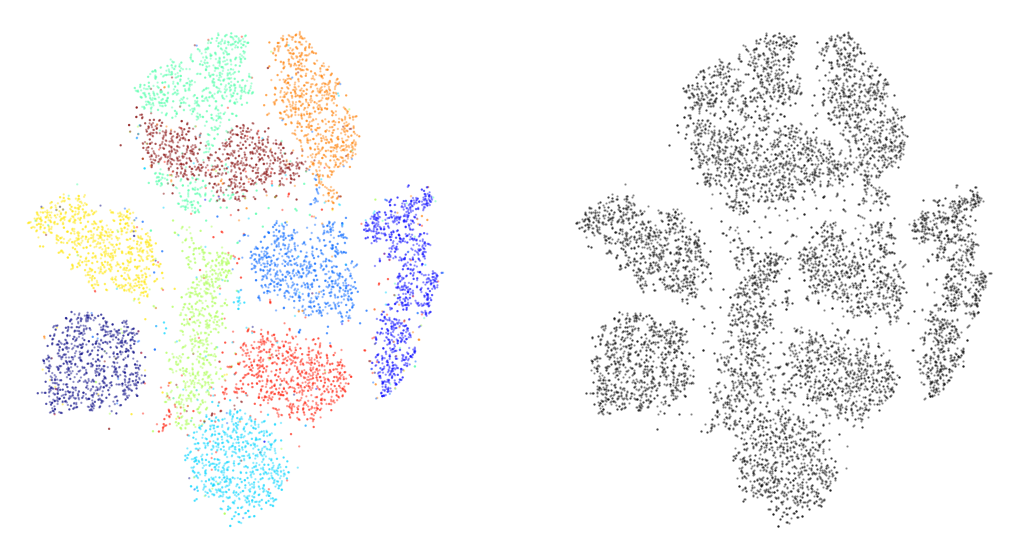

In [ ]:
grafico(tsne_results, fitxer='tsne_mnist')

# PCA


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

#x_train_d_scaled = scale(x_train_d, axis=0)
# falta escalar los datos 

pcaf_2d = PCA(n_components=2)
pca_2d = pcaf_2d.fit_transform(x_full)

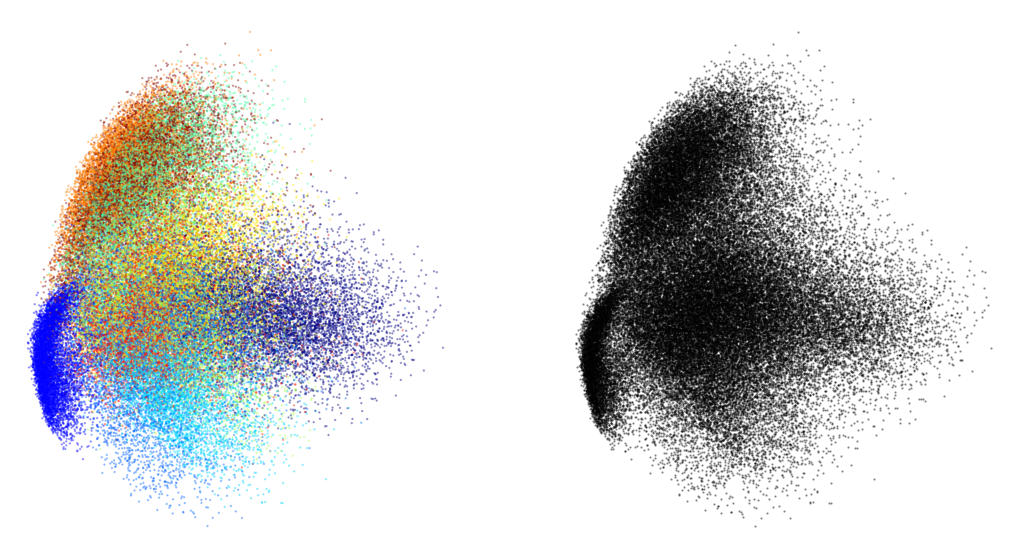

In [ ]:
grafico(pca_2d, fitxer='pca_mnist')

# UMAP

In [ ]:
import umap

fit = umap.UMAP( n_neighbors=30, min_dist=0, n_components=2, metric="euclidean", random_state=semilla)
umap_2d = fit.fit_transform(x_full)

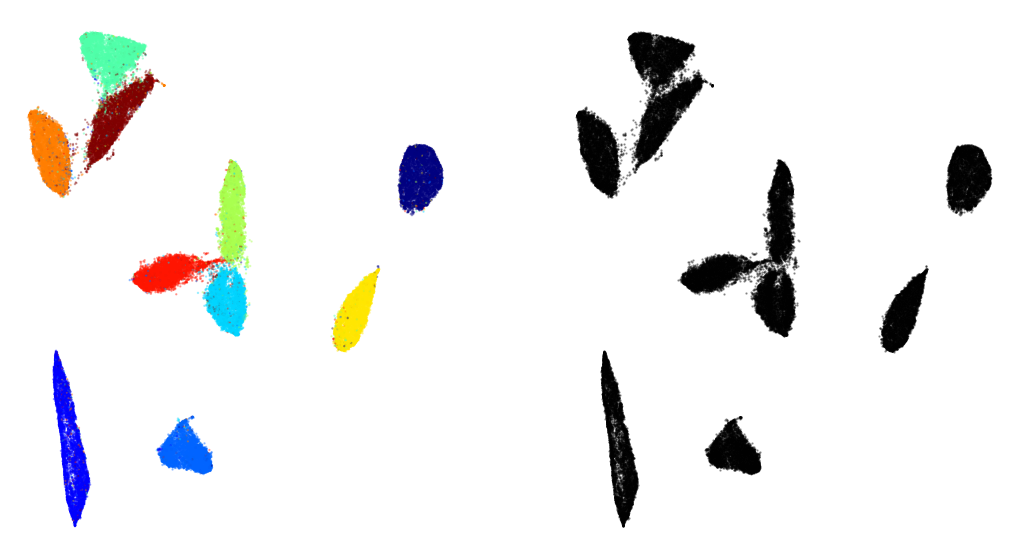

In [ ]:
grafico(umap_2d, fitxer='umap_mnist')



---



In [ ]:
fit = umap.UMAP( n_neighbors=15, min_dist=0.1, n_components=2, metric="euclidean", random_state=semilla)
umap_2d = fit.fit_transform(x_full)

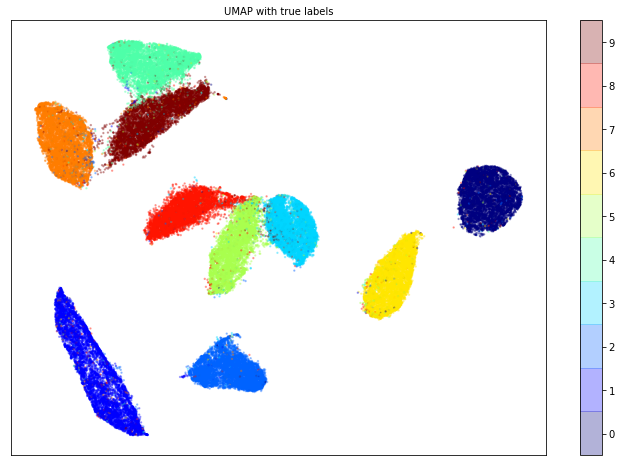

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter( umap_2d[:,0], umap_2d[:,1], c= y_full, cmap=plt.cm.get_cmap('jet', 10), s=2, alpha=0.3) 
plt.setp(ax, xticks = [], yticks = [])
ax.set_title('UMAP with true labels', fontsize=10)
#plt.title(titol, fontsize=18)

cbar = plt.colorbar(boundaries = np.arange(11)-0.5, cmap=plt.cm.get_cmap('jet', 10))
cbar.set_ticks(np.arange(10))
#cbar.set_ticklabels(noms)
#cbar.ax.set_ylabel('Label of each garment', rotation=270, fontsize=10)

fig.savefig( "umap_mnist_labels" )
plt.show()



---



.



---



# **Clustering**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html#sklearn.metrics.normalized_mutual_info_score

Silhouette score: 

*   The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
*   The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

*   The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [ ]:
import sklearn.cluster as cluster
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
!pip install coclust
from coclust.evaluation.external import accuracy

  Created wheel for coclust: filename=coclust-0.2.1-cp36-none-any.whl size=29872 sha256=7fb2a3a011d7539a2e46e27d3bb58bdba2cc345137b277119a974318a249e3d7
  Stored in directory: /root/.cache/pip/wheels/cd/d7/68/df601d0b5f8b934cf890dc626c2271df381fb0c3e910b0a34e
Successfully built coclust


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
kmeans_labels_original_full = cluster.KMeans(n_clusters=10, n_init=10, random_state=1997).fit_predict( x_full ) # ya te da las labels / fit_predict() vs fit()

In [ ]:
kmeans_labels_original_full

array([0, 4, 8, ..., 1, 3, 5], dtype=int32)

In [ ]:
#from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score, adjusted_rand_score

print( 'NMI:', normalized_mutual_info_score(y_full, kmeans_labels_original_full) )
print( 'AMI:', adjusted_mutual_info_score(y_full, kmeans_labels_original_full) )
print( 'ARI:', adjusted_rand_score(y_full, kmeans_labels_original_full) )
print( 'ACC:', accuracy(y_full, kmeans_labels_original_full) )
#print( 'SIL:', silhouette_score(x_full, kmeans_labels_original_full)  )

NMI: 0.4998351008816089
AMI: 0.49970835194964336
ARI: 0.3665652598653444
ACC: 0.5346142857142857


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


# PCA + HDBSCAN

In [ ]:
!pip install hdbscan
import hdbscan

     |████████████████████████████████| 4.7MB 5.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2305917 sha256=5ae28da7c6a1ad0f8c2917a1c5e2a10f2438fcf3d2e44502818be6d3a14bb2f9
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [ ]:
pca_50d = PCA(n_components=50).fit_transform(x_full)

hdlabels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit(pca_50d).labels_ # cluster_selection_epsilon


In [ ]:
unique_elements, counts_elements = np.unique( hdlabels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   -1     0     1     2     3     4]
 [57987  1864   691  1175   967  7316]]


In [ ]:
clustered = hdlabels >= 0

print( 'No grey observations' )
print( 'NMI:', normalized_mutual_info_score(y_full[clustered], hdlabels[clustered]) )
print( 'ARI:', adjusted_rand_score(y_full[clustered], hdlabels[clustered]) )
print( 'ACC:', accuracy(y_full[clustered], hdlabels[clustered]) )

print( 'NMI:', normalized_mutual_info_score(y_full, hdlabels) )

No grey observations
NMI: 0.9950641552243658
ARI: 0.998017970867265
ACC: 0.9990010821609923
NMI: 0.30845905656942757


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


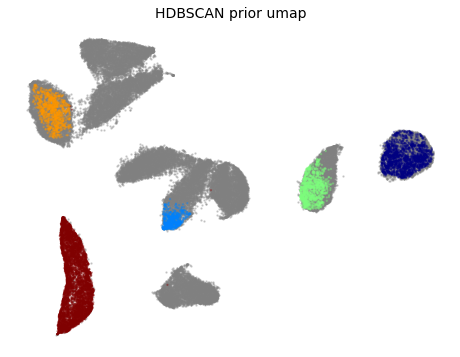

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
#clustered

ax.scatter( umap_2d[ ~clustered ,0], umap_2d[ ~clustered ,1], c= "gray" , s=2 ,alpha=0.3)  

ax.scatter( umap_2d[ clustered,0], umap_2d[clustered,1], c= hdlabels[clustered] , 
                cmap=plt.cm.get_cmap('jet', hdlabels.max()+1), s=2 ,alpha=0.3) 
plt.axis('off')
plt.title("HDBSCAN prior umap", fontsize=14)

plt.savefig('umap2_hdbscan_mnist.png')
plt.show()

# tsne2 + kmeans

In [ ]:
kmeans_labels_tsne = cluster.KMeans(n_clusters=10, n_init=10, random_state=1997).fit_predict( tsne_results )

In [ ]:
print( 'NMI:', normalized_mutual_info_score(y_rfull, kmeans_labels_tsne) )
print( 'AMI:', adjusted_mutual_info_score(y_rfull, kmeans_labels_tsne) )
print( 'ARI:', adjusted_rand_score(y_rfull, kmeans_labels_tsne) )
print( 'ACC:', accuracy(y_rfull, kmeans_labels_tsne) )

NMI: 0.7663644287712508
AMI: 0.7659475726198757
ARI: 0.6910928233050622
ACC: 0.7744


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


# umap2 + kmeans

In [ ]:
kmeans_labels_umap = cluster.KMeans(n_clusters=10, n_init=10, random_state=1997).fit_predict( umap_2d )

In [ ]:
print( 'NMI:', normalized_mutual_info_score(y_full, kmeans_labels_umap) )
print( 'AMI:', adjusted_mutual_info_score(y_full, kmeans_labels_umap) )
print( 'ARI:', adjusted_rand_score(y_full, kmeans_labels_umap) )
print( 'ACC:', accuracy(y_full, kmeans_labels_umap) )

NMI: 0.8313946306711064
AMI: 0.8313516882575567
ARI: 0.7451182617978654
ACC: 0.8007285714285715


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


# umap2 + hdbscan

In [ ]:
hdlabels_umap = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit(umap_2d).labels_

In [ ]:
unique_elements, counts_elements = np.unique( hdlabels_umap, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  -1    0    1    2    3    4    5    6    7    8    9]
 [ 607 8142 6789 6976 6969 7383 6363 7109 6243 6610 6809]]


In [ ]:
clustered = hdlabels_umap >= 0

print( 'No grey observations' )
print( 'NMI:', normalized_mutual_info_score(y_full[clustered], hdlabels_umap[clustered]) )
print( 'ARI:', adjusted_rand_score(y_full[clustered], hdlabels_umap[clustered]) )
print( 'ACC:', accuracy(y_full[clustered], hdlabels_umap[clustered]) )

print( 'NMI:', normalized_mutual_info_score(y_full, hdlabels_umap) )

No grey observations
NMI: 0.917704969452589
ARI: 0.9307878272612738
ACC: 0.9679506578473333
NMI: 0.9058674086965325


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)




---





---



In [ ]:
from time import time

In [ ]:
t1 = time()

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10, covariance_type = "full", n_init=1, init_params= "kmeans", max_iter=5 ).fit(x_full)
labels = gmm.predict(x_full)

t2 = time()
t2-t1

# Check the scalability of GMM with 5 iterations: 100 seconds for each iter. 36 iterations in an hour?

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


517.5960812568665

In [ ]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
!pip install coclust
from coclust.evaluation.external import accuracy

  Created wheel for coclust: filename=coclust-0.2.1-cp36-none-any.whl size=29873 sha256=a33ea1b62d837eba04b4afb01ecb9d5926ea895e5266b9f7b405fe4cdd078407
  Stored in directory: /root/.cache/pip/wheels/cd/d7/68/df601d0b5f8b934cf890dc626c2271df381fb0c3e910b0a34e
Successfully built coclust


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
print( 'NMI:', normalized_mutual_info_score(y_full, labels) )
print( 'ARI:', adjusted_rand_score(y_full, labels) )
print( 'ACC:', accuracy(y_full, labels) )

NMI: 0.37615816684705655
ARI: 0.2568165954161218
ACC: 0.4502285714285714


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
t1 = time()

from sklearn.mixture import GaussianMixture

gmm2 = GaussianMixture(n_components=10, covariance_type = "diag", n_init=10, init_params= "kmeans", verbose = 2 ).fit(x_full) # , max_iter=30
labels2 = gmm2.predict(x_full)

t2 = time()
t2-t1

In [ ]:
print( 'NMI:', normalized_mutual_info_score(y_full, labels2) )
print( 'ARI:', adjusted_rand_score(y_full, labels2) )
print( 'ACC:', accuracy(y_full, labels2) )

NMI: 0.32297790262714265
ARI: 0.1993100313426591
ACC: 0.37474285714285716


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


It does perform very well, even compared to K-means. 
